In [2]:
import re
import pandas as pd

# Path to the file
file_path = "revisedtest1.txt"

# Define the regex pattern
pattern = re.compile(r"""
    n=(?P<n>\d+),\s+p=(?P<p>\d+),\s+q=(?P<q>\d+)  
    .*?Condition\s+Number:\s+(?P<condition>\d+\.\d+) 
    .*?LU\s+Pivot\s+Error\s+(?P<lu_pivot_error>[e\d\.\+-]+)  
    .*?LU\s+Pivot\s+\+\s+Forward\s+Error\s+(?P<lu_pivot_forward_error>[e\d\.\+-]+)
    .*?LU\s+Pivot\s+\+\s+Backward\s+Error\s+(?P<lu_pivot_backward_error>[e\d\.\+-]+)
    .*?LU\s+Pivot\s+\+\s+Forward\s+Time\s+(?P<lu_pivot_forward_time>[e\d\.\+-]+)
    .*?LU\s+Pivot\s+\+\s+Backward\s+Time\s+(?P<lu_pivot_backward_time>[e\d\.\+-]+)
    .*?LU\s+Pivot\s+FLOPs:\s+(?P<lu_pivot_flops>[e\d\.\+-]+)
    .*?Recursive\s+LU\s+\+\s+Forward\s+Error\s+(?P<recursive_lu_forward_error>[e\d\.\+-]+)
    .*?Recursive\s+LU\s+\+\s+Backward\s+Error\s+(?P<recursive_lu_backward_error>[e\d\.\+-]+)
    .*?Recursive\s+LU\s+\+\s+Forward\s+Time\s+(?P<recursive_lu_forward_time>[e\d\.\+-]+)
    .*?Recursive\s+LU\s+\+\s+Backward\s+Time\s+(?P<recursive_lu_backward_time>[e\d\.\+-]+)
    .*?Recursive\s+LU\s+FLOPs:\s+(?P<recursive_lu_flops>[e\d\.\+-]+)
    .*?Block\s+LU\s+\+\s+Forward\s+Error\s+(?P<block_lu_forward_error>[e\d\.\+-]+)
    .*?Block\s+LU\s+\+\s+Backward\s+Error\s+(?P<block_lu_backward_error>[e\d\.\+-]+)
    .*?Block\s+LU\s+\+\s+Forward\s+Time\s+(?P<block_lu_forward_time>[e\d\.\+-]+)
    .*?Block\s+LU\s+\+\s+Backward\s+Time\s+(?P<block_lu_backward_time>[e\d\.\+-]+)
    .*?Block\s+LU\s+FLOPs:\s+(?P<block_lu_flops>[e\d\.\+-]+)
""", re.VERBOSE | re.DOTALL)

# Read the file
with open(file_path, 'r') as file:
    content = file.read()

# Find all matches
matches = pattern.findall(content)

# Create a DataFrame from the extracted data
columns = [
    'n', 'p', 'q', 'condition', 
    'lu_pivot_error', 'lu_pivot_forward_error', 'lu_pivot_backward_error', 'lu_pivot_forward_time', 'lu_pivot_backward_time', 'lu_pivot_flops', 
    'recursive_lu_forward_error', 'recursive_lu_backward_error', 'recursive_lu_forward_time', 'recursive_lu_backward_time', 'recursive_lu_flops',
    'block_lu_forward_error', 'block_lu_backward_error', 'block_lu_forward_time', 'block_lu_backward_time', 'block_lu_flops'
]

data = pd.DataFrame(matches, columns=columns)

# Convert numeric columns to the correct type
for col in ['n', 'p', 'q', 'condition', 'lu_pivot_error', 'lu_pivot_forward_error', 'lu_pivot_backward_error',
            'lu_pivot_forward_time', 'lu_pivot_backward_time', 'lu_pivot_flops', 'recursive_lu_forward_error',
            'recursive_lu_backward_error', 'recursive_lu_forward_time', 'recursive_lu_backward_time',
            'recursive_lu_flops', 'block_lu_forward_error', 'block_lu_backward_error', 'block_lu_forward_time',
            'block_lu_backward_time', 'block_lu_flops']:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [ ]:
# Save to CSV 
data.to_csv("extracted_data.csv", index=False)

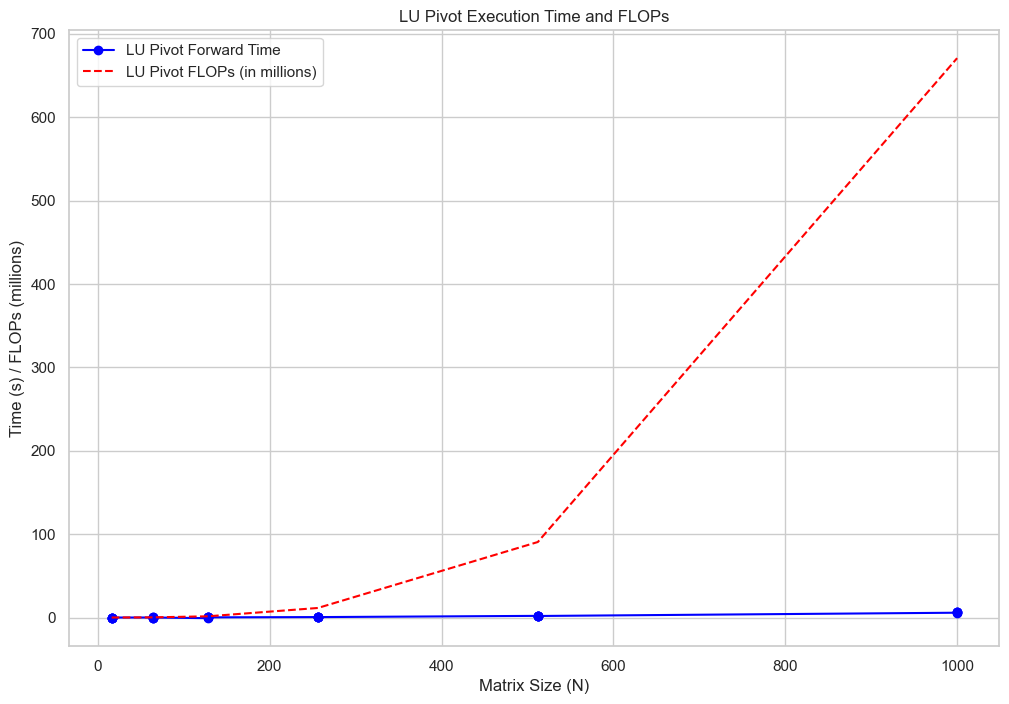

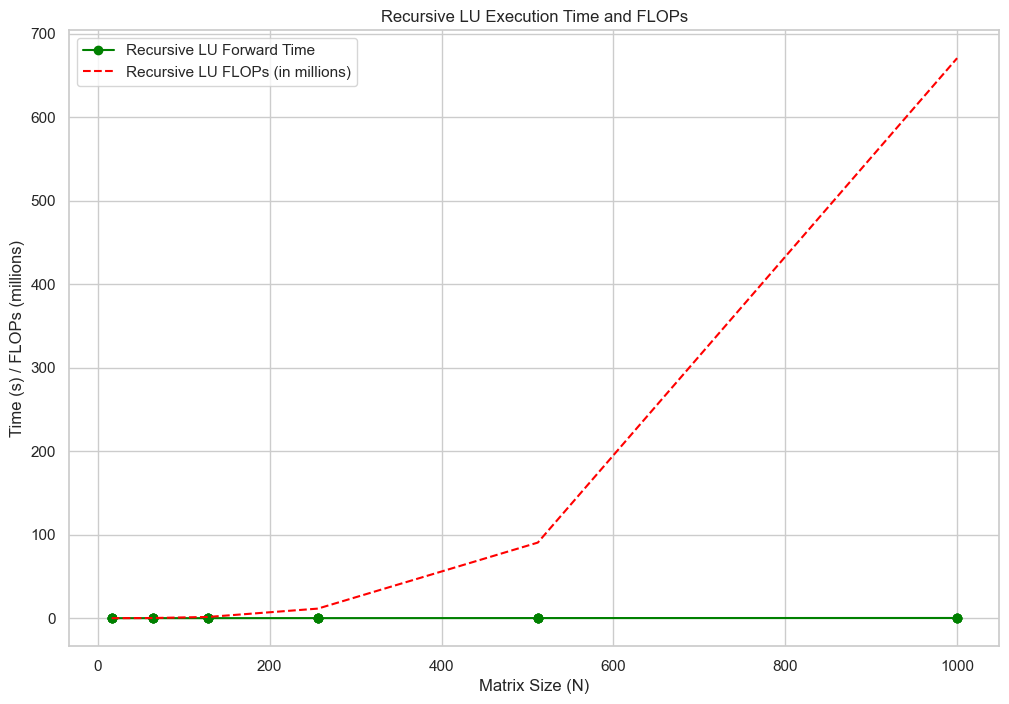

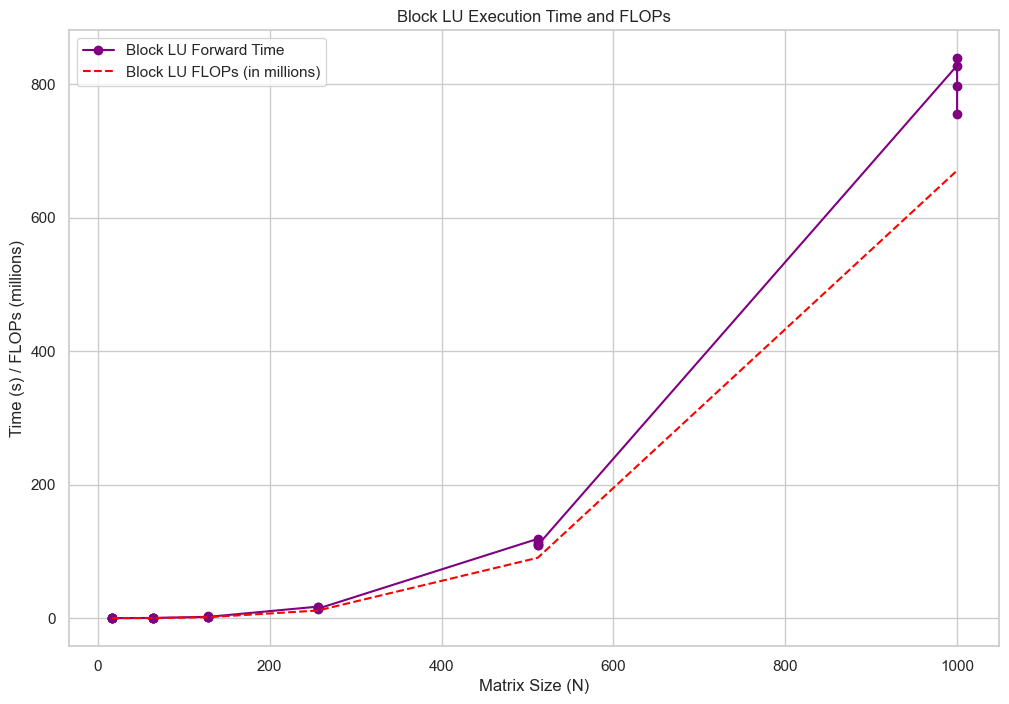

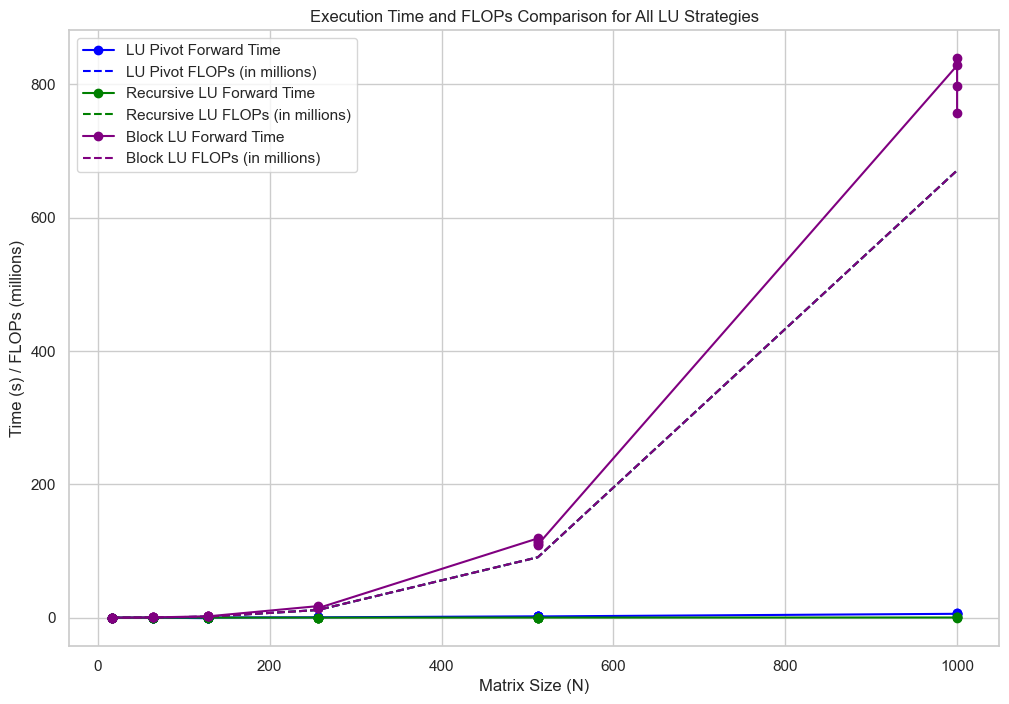

In [8]:
import matplotlib.pyplot as plt

# Data extracted (use your actual data here)
matrix_sizes = data['n']
lu_pivot_times = data['lu_pivot_forward_time']
recursive_lu_times = data['recursive_lu_forward_time']
block_lu_times = data['block_lu_forward_time']

lu_pivot_flops = data['lu_pivot_flops'] / 1e6  # converting to millions
recursive_lu_flops = data['recursive_lu_flops'] / 1e6  # converting to millions
block_lu_flops = data['block_lu_flops'] / 1e6  # converting to millions

# Plotting LU Pivot
plt.figure(figsize=(12, 8))
plt.plot(matrix_sizes, lu_pivot_times, 'o-', label='LU Pivot Forward Time', color='blue')
plt.plot(matrix_sizes, lu_pivot_flops, '--', label='LU Pivot FLOPs (in millions)', color='red')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Time (s) / FLOPs (millions)')
plt.title('LU Pivot Execution Time and FLOPs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Recursive LU
plt.figure(figsize=(12, 8))
plt.plot(matrix_sizes, recursive_lu_times, 'o-', label='Recursive LU Forward Time', color='green')
plt.plot(matrix_sizes, recursive_lu_flops, '--', label='Recursive LU FLOPs (in millions)', color='red')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Time (s) / FLOPs (millions)')
plt.title('Recursive LU Execution Time and FLOPs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Block LU
plt.figure(figsize=(12, 8))
plt.plot(matrix_sizes, block_lu_times, 'o-', label='Block LU Forward Time', color='purple')
plt.plot(matrix_sizes, block_lu_flops, '--', label='Block LU FLOPs (in millions)', color='red')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Time (s) / FLOPs (millions)')
plt.title('Block LU Execution Time and FLOPs')
plt.legend()
plt.grid(True)
plt.show()

# Combined Plot for Comparison
plt.figure(figsize=(12, 8))
plt.plot(matrix_sizes, lu_pivot_times, 'o-', label='LU Pivot Forward Time', color='blue')
plt.plot(matrix_sizes, lu_pivot_flops, '--', label='LU Pivot FLOPs (in millions)', color='blue')
plt.plot(matrix_sizes, recursive_lu_times, 'o-', label='Recursive LU Forward Time', color='green')
plt.plot(matrix_sizes, recursive_lu_flops, '--', label='Recursive LU FLOPs (in millions)', color='green')
plt.plot(matrix_sizes, block_lu_times, 'o-', label='Block LU Forward Time', color='purple')
plt.plot(matrix_sizes, block_lu_flops, '--', label='Block LU FLOPs (in millions)', color='purple')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Time (s) / FLOPs (millions)')
plt.title('Execution Time and FLOPs Comparison for All LU Strategies')
plt.legend()
plt.grid(True)
plt.show()


    n  p  q   condition  condition_status  lu_pivot_forward_error  \
0  16  1  1  248.157995  Well-Conditioned            5.551100e-17   
1  16  2  1   86.812667  Well-Conditioned            3.379500e-16   
2  16  3  4   71.879637  Well-Conditioned            2.482500e-16   
3  16  4  4  173.735932  Well-Conditioned            4.335600e-16   
4  16  8  8   91.347701  Well-Conditioned            3.682200e-16   

   lu_pivot_backward_error  recursive_lu_forward_error  \
0             7.928600e-16                1.555300e-15   
1             6.866400e-16                1.054000e-15   
2             4.509700e-16                4.331300e-15   
3             2.497400e-15                6.061900e-16   
4             6.955500e-16                9.453200e-16   

   recursive_lu_backward_error  block_lu_forward_error  \
0                 4.997900e-16            1.841100e-15   
1                 7.617600e-16            1.409800e-15   
2                 4.959800e-13            6.407900e-16   
3   

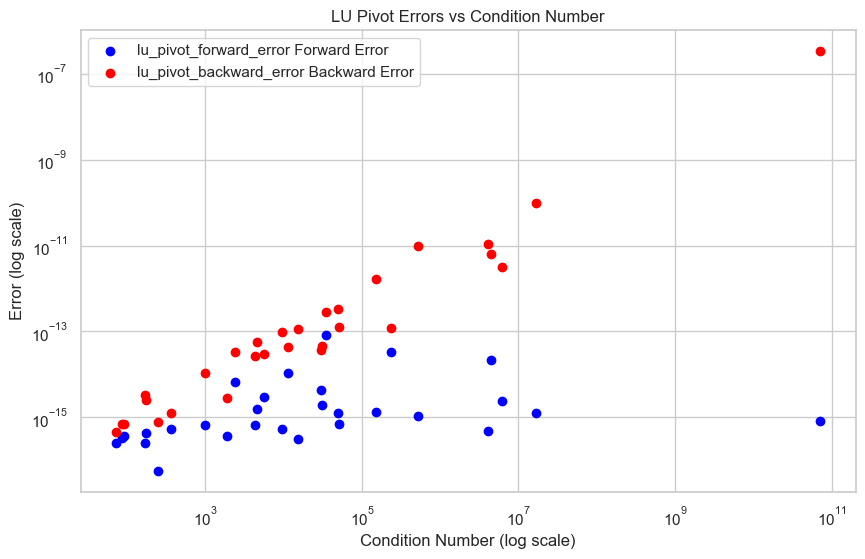

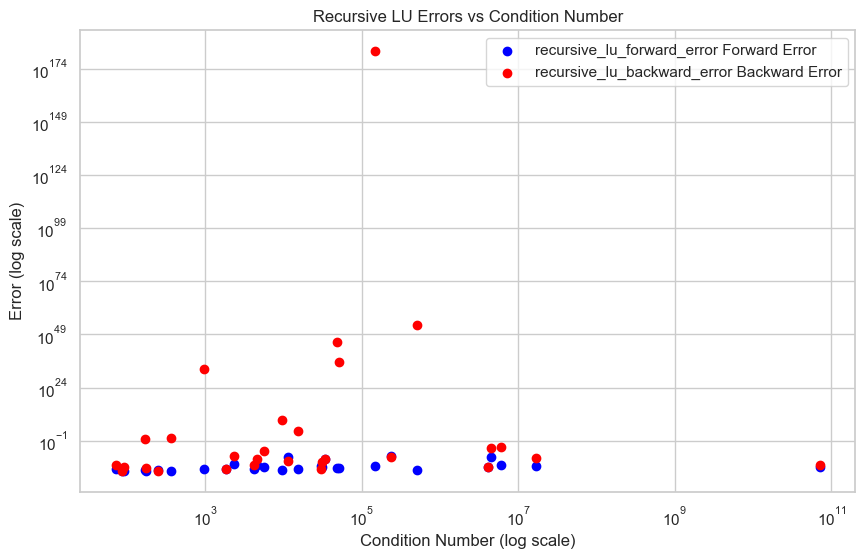

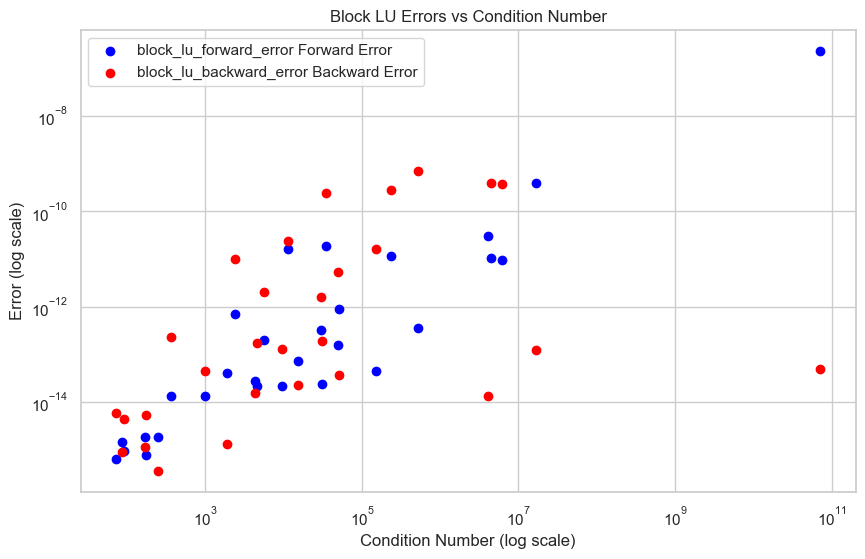


Condition Summary (Well-Conditioned vs Ill-Conditioned):
Well-Conditioned    28
Ill-Conditioned      1
Name: condition_status, dtype: int64


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the extracted data from CSV
data = pd.read_csv("extracted_data.csv")

# Determine a threshold for condition number that distinguishes well-conditioned and ill-conditioned matrices
ill_conditioned_threshold = 1e10

# Add a column to categorize condition number
data['condition_status'] = np.where(data['condition'] > ill_conditioned_threshold, 'Ill-Conditioned', 'Well-Conditioned')

# Filter the necessary columns for further analysis
columns_of_interest = [
    'n', 'p', 'q', 'condition', 'condition_status',
    'lu_pivot_forward_error', 'lu_pivot_backward_error',
    'recursive_lu_forward_error', 'recursive_lu_backward_error',
    'block_lu_forward_error', 'block_lu_backward_error'
]
analysis_data = data[columns_of_interest]

# Display the first few rows to check if the data looks correct
print(analysis_data.head())

# Analysis of condition number vs error propagation
# Let's plot the condition number against the errors for each decomposition method (LU Pivot, Recursive LU, Block LU)

def plot_error_vs_condition(errors, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['condition'], data[errors[0]], color='blue', label=f'{errors[0]} Forward Error')
    plt.scatter(data['condition'], data[errors[1]], color='red', label=f'{errors[1]} Backward Error')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Condition Number (log scale)')
    plt.ylabel('Error (log scale)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting the errors against the condition number
plot_error_vs_condition(['lu_pivot_forward_error', 'lu_pivot_backward_error'], 'LU Pivot Errors vs Condition Number')
plot_error_vs_condition(['recursive_lu_forward_error', 'recursive_lu_backward_error'], 'Recursive LU Errors vs Condition Number')
plot_error_vs_condition(['block_lu_forward_error', 'block_lu_backward_error'], 'Block LU Errors vs Condition Number')

# Summary of condition status
condition_summary = data['condition_status'].value_counts()
print("\nCondition Summary (Well-Conditioned vs Ill-Conditioned):")
print(condition_summary)



Performance Data Summary:
    n  p  q   condition  lu_pivot_flops  lu_pivot_forward_error  \
0  16  1  1  248.157995         3690.67            5.551100e-17   
1  16  2  1   86.812667         3690.67            3.379500e-16   
2  16  3  4   71.879637         3690.67            2.482500e-16   
3  16  4  4  173.735932         3690.67            4.335600e-16   
4  16  8  8   91.347701         3690.67            3.682200e-16   

   lu_pivot_backward_error  recursive_lu_flops  recursive_lu_forward_error  \
0             7.928600e-16             3690.67                1.555300e-15   
1             6.866400e-16             3690.67                1.054000e-15   
2             4.509700e-16             3690.67                4.331300e-15   
3             2.497400e-15             3690.67                6.061900e-16   
4             6.955500e-16             3690.67                9.453200e-16   

   recursive_lu_backward_error  block_lu_flops  block_lu_forward_error  \
0                 4.997900e-

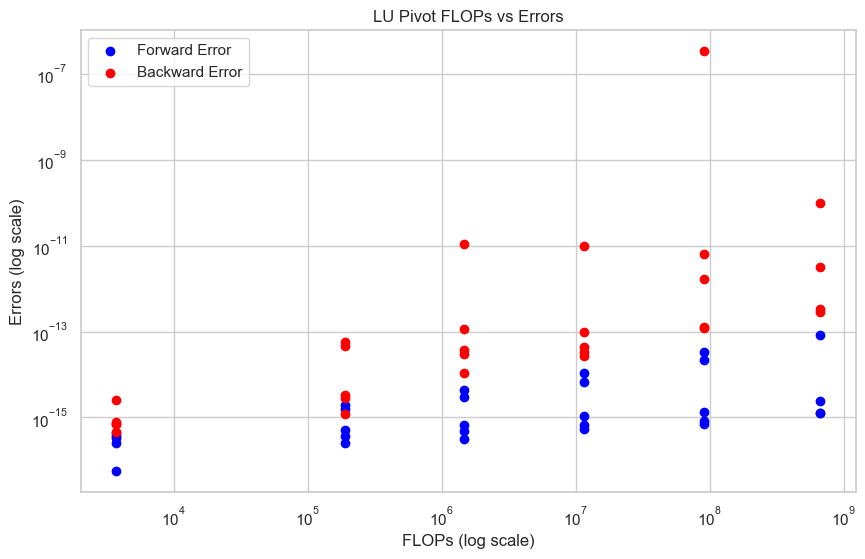

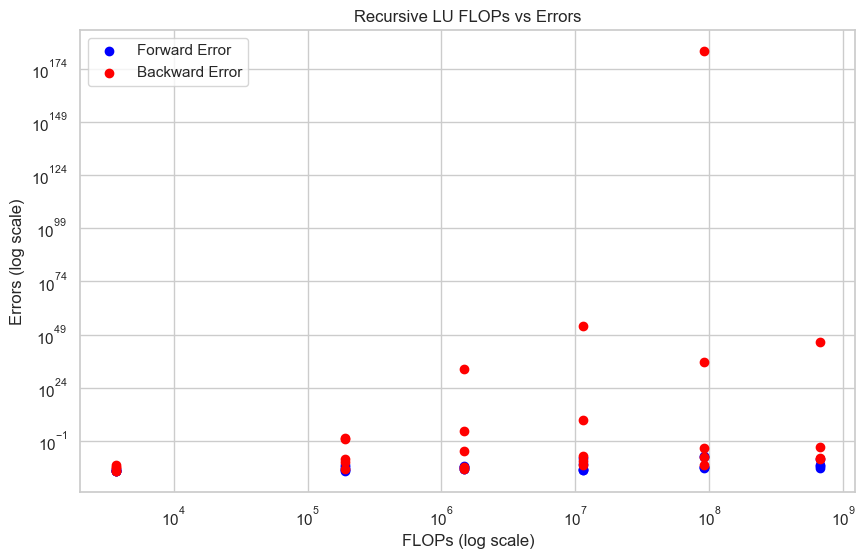

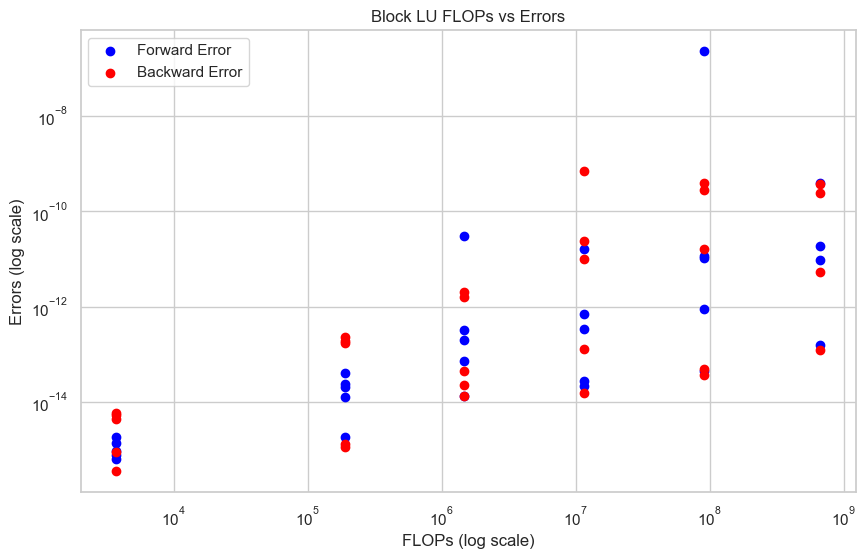

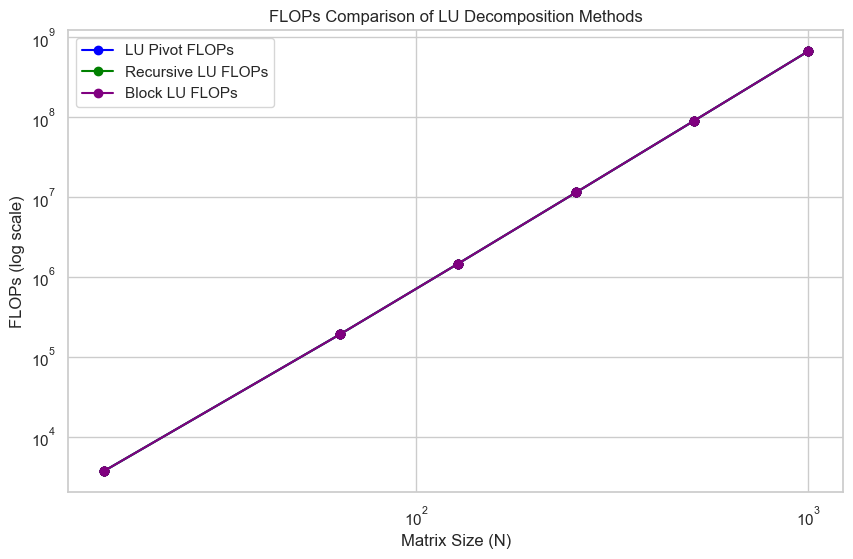

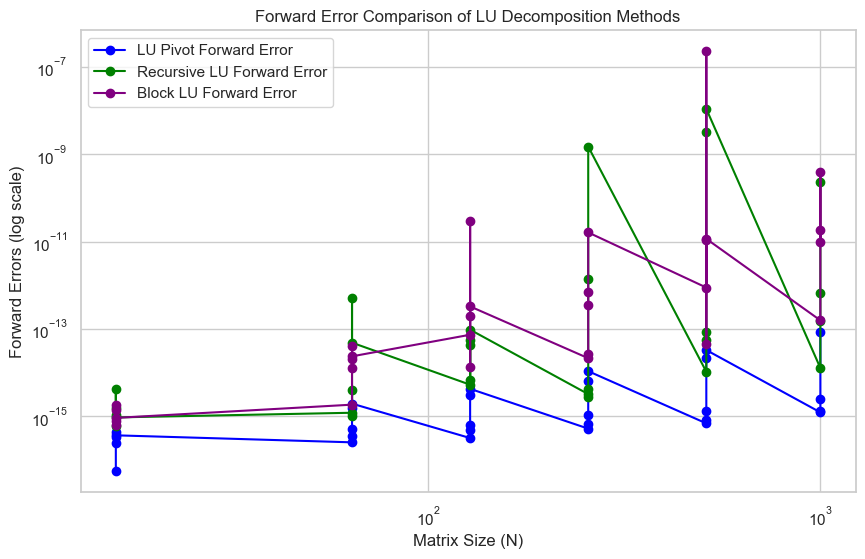

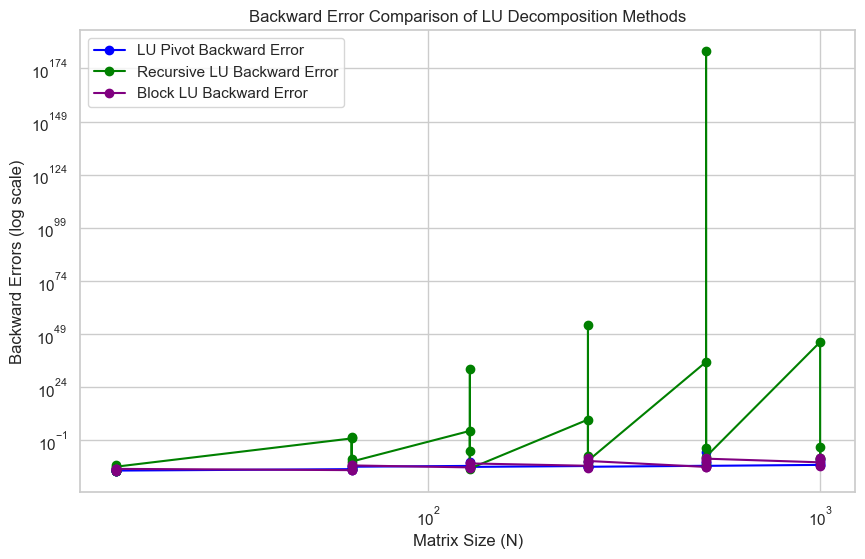


Performance Summary based on Matrix Size (N):
      n  lu_pivot_flops  lu_pivot_forward_error  lu_pivot_backward_error  \
0    16    3.690670e+03            2.886982e-16             1.024684e-15   
1    64    1.908910e+05            9.335220e-16             2.192074e-14   
2   128    1.463130e+06            1.745160e-15             2.209082e-12   
3   256    1.144590e+07            3.924594e-15             2.046245e-12   
4   512    9.052500e+07            1.153000e-14             6.736966e-08   
5  1000    6.706630e+08            2.210965e-14             2.615064e-11   

   recursive_lu_flops  recursive_lu_forward_error  \
0        3.690670e+03                1.698422e-15   
1        1.908910e+05                1.126735e-13   
2        1.463130e+06                4.144850e-14   
3        1.144590e+07                2.983399e-10   
4        9.052500e+07                2.821971e-09   
5        6.706630e+08                5.701394e-11   

   recursive_lu_backward_error  block_lu_flops  

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the extracted data from CSV
data = pd.read_csv("extracted_data.csv")

# Summarize relevant columns for FLOPs and Errors
performance_columns = [
    'n', 'p', 'q', 'condition',
    'lu_pivot_flops', 'lu_pivot_forward_error', 'lu_pivot_backward_error',
    'recursive_lu_flops', 'recursive_lu_forward_error', 'recursive_lu_backward_error',
    'block_lu_flops', 'block_lu_forward_error', 'block_lu_backward_error'
]
performance_data = data[performance_columns]

# Display summary for the first few rows
print("Performance Data Summary:")
print(performance_data.head())

# Now compare FLOPs and errors in terms of accuracy
def plot_flops_vs_errors(method_flops, method_forward_error, method_backward_error, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[method_flops], data[method_forward_error], color='blue', label='Forward Error')
    plt.scatter(data[method_flops], data[method_backward_error], color='red', label='Backward Error')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('FLOPs (log scale)')
    plt.ylabel('Errors (log scale)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for each method
plot_flops_vs_errors('lu_pivot_flops', 'lu_pivot_forward_error', 'lu_pivot_backward_error', 'LU Pivot FLOPs vs Errors')
plot_flops_vs_errors('recursive_lu_flops', 'recursive_lu_forward_error', 'recursive_lu_backward_error', 'Recursive LU FLOPs vs Errors')
plot_flops_vs_errors('block_lu_flops', 'block_lu_forward_error', 'block_lu_backward_error', 'Block LU FLOPs vs Errors')

# Now compare the performance of the three methods in a single plot for FLOPs
plt.figure(figsize=(10, 6))
plt.plot(data['n'], data['lu_pivot_flops'], color='blue', marker='o', label='LU Pivot FLOPs')
plt.plot(data['n'], data['recursive_lu_flops'], color='green', marker='o', label='Recursive LU FLOPs')
plt.plot(data['n'], data['block_lu_flops'], color='purple', marker='o', label='Block LU FLOPs')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Matrix Size (N)')
plt.ylabel('FLOPs (log scale)')
plt.title('FLOPs Comparison of LU Decomposition Methods')
plt.legend()
plt.grid(True)
plt.show()

# Compare the errors of the three methods in a single plot for forward errors
plt.figure(figsize=(10, 6))
plt.plot(data['n'], data['lu_pivot_forward_error'], color='blue', marker='o', label='LU Pivot Forward Error')
plt.plot(data['n'], data['recursive_lu_forward_error'], color='green', marker='o', label='Recursive LU Forward Error')
plt.plot(data['n'], data['block_lu_forward_error'], color='purple', marker='o', label='Block LU Forward Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Forward Errors (log scale)')
plt.title('Forward Error Comparison of LU Decomposition Methods')
plt.legend()
plt.grid(True)
plt.show()

# Compare the errors of the three methods in a single plot for backward errors
plt.figure(figsize=(10, 6))
plt.plot(data['n'], data['lu_pivot_backward_error'], color='blue', marker='o', label='LU Pivot Backward Error')
plt.plot(data['n'], data['recursive_lu_backward_error'], color='green', marker='o', label='Recursive LU Backward Error')
plt.plot(data['n'], data['block_lu_backward_error'], color='purple', marker='o', label='Block LU Backward Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Backward Errors (log scale)')
plt.title('Backward Error Comparison of LU Decomposition Methods')
plt.legend()
plt.grid(True)
plt.show()

# Analyze which method has the best performance in terms of FLOPs and accuracy
performance_summary = performance_data.groupby('n').agg({
    'lu_pivot_flops': 'mean',
    'lu_pivot_forward_error': 'mean',
    'lu_pivot_backward_error': 'mean',
    'recursive_lu_flops': 'mean',
    'recursive_lu_forward_error': 'mean',
    'recursive_lu_backward_error': 'mean',
    'block_lu_flops': 'mean',
    'block_lu_forward_error': 'mean',
    'block_lu_backward_error': 'mean'
}).reset_index()

# Display the summarized performance data
print("\nPerformance Summary based on Matrix Size (N):")
print(performance_summary)

# Save the summarized data for future analysis
performance_summary.to_csv('performance_comparison_summary.csv', index=False)
